# Linear Regression on Simple Dataset

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read Data Set

In [3]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Coding Samurai\Linear Regression Simple Project\Dataset\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##### Here, TV serves as “Advertising Spend” and sales as the target. 

### Data Cleaning 

In [4]:
df.shape

(200, 4)

In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [11]:
df[['TV', 'Sales']].describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


#### Observations

##### TV Spend Distribution:

###### TV spend varies significantly, ranging from ~0.7 to ~296.4 units.

###### Wide spread and high standard deviation (≈85.85) suggest diverse marketing budgets across samples.

##### Sales Distribution:

###### Sales figures range from ~1.6 to ~27, with a mean around 15.

###### Compared to the TV spend, the variation in sales is tighter (standard deviation ≈5.22), indicating more consistency.

### EDA :- Exploratory Data Analysis

#### i) Distribution plot

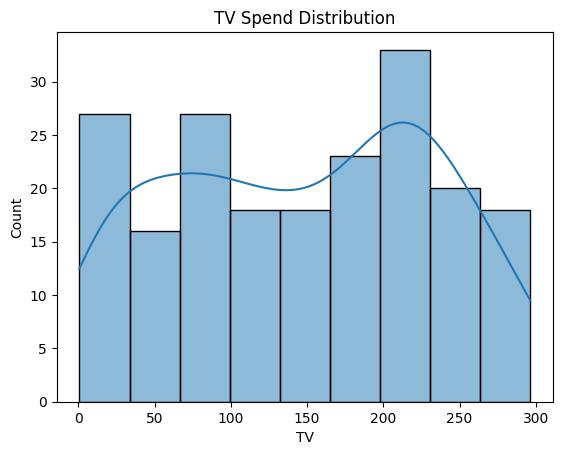

In [13]:
sns.histplot(df['TV'], kde=True)
plt.title('TV Spend Distribution')
plt.show()


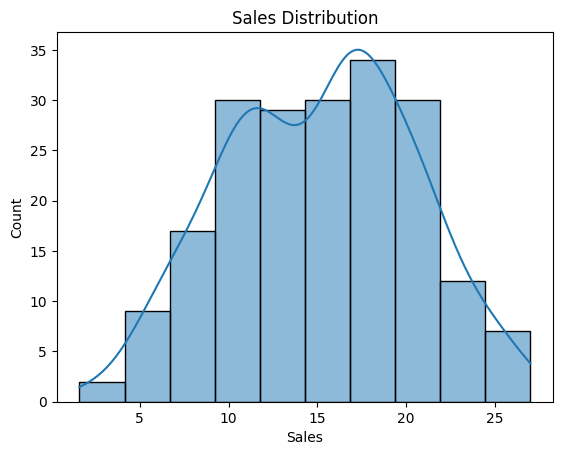

In [15]:
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

#### ii) Correlation & pair plot

Correlation:
              TV     Sales
TV     1.000000  0.901208
Sales  0.901208  1.000000


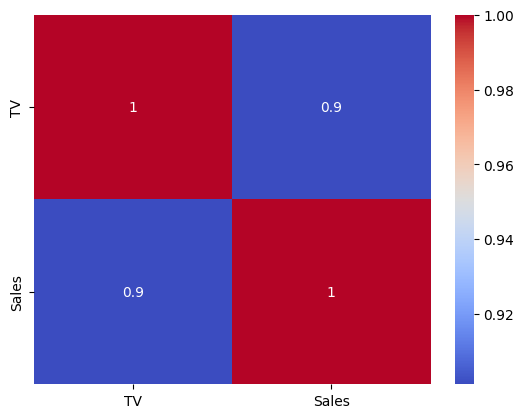

In [19]:
corr = df[['TV','Sales']].corr()
print("Correlation:\n", corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Correlation Coefficient (TV vs Sales): The value is ~0.90, indicating a strong positive correlation between TV advertising spend and sales.

Pair plot


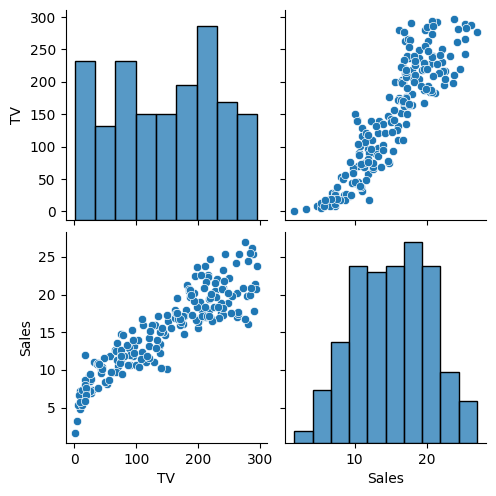

In [20]:
print('Pair plot')
sns.pairplot(df[['TV','Sales']]); plt.show()

The scatter plot reveals a linear upward trend, though not perfectly uniform.

There's some dispersion around the trend line especially at higher TV spend values suggesting that while the relationship is linear, it’s not flawless.

#### iii) Outlier Treatment

Tv boxplot


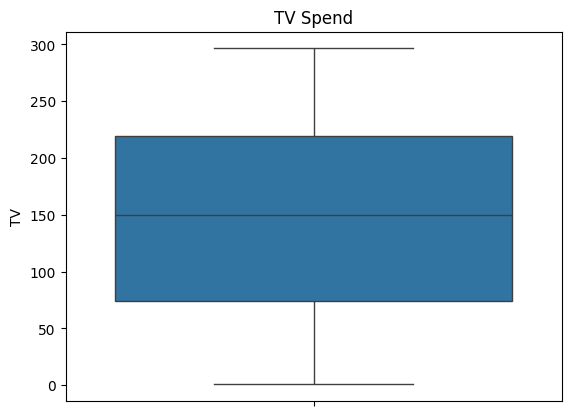

Sakes boxplot


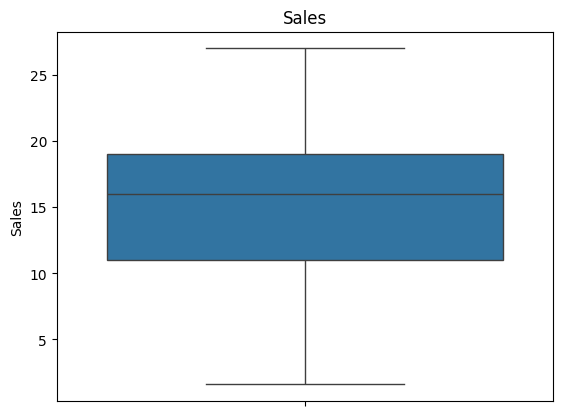

In [21]:
print('Tv boxplot')
sns.boxplot(y=df['TV'])
plt.title('TV Spend')
plt.show()


print("Sakes boxplot")
sns.boxplot(y=df['Sales'])
plt.title('Sales')
plt.show()

here the tv and sales doesn't have any outliers. so need to implement the outlier treatment 

#### iv) Relationship Visualization

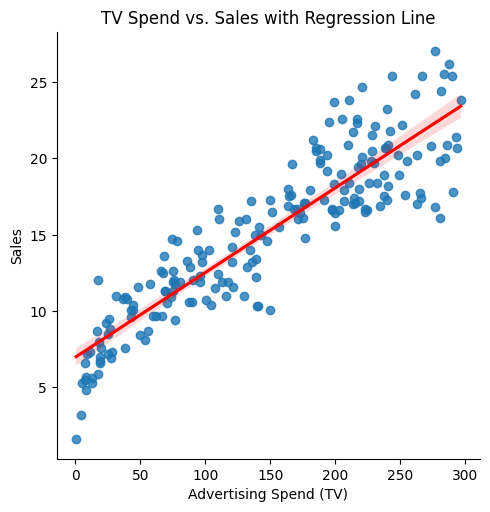

In [22]:
sns.lmplot(x='TV', y='Sales', data=df, line_kws={'color':'red'})
plt.title('TV Spend vs. Sales with Regression Line')
plt.xlabel('Advertising Spend (TV)')
plt.ylabel('Sales')
plt.show()


We can see here the trend line is Clear positive linear trend .So It is suitable for linear regression.

### Model Building

In [26]:
from sklearn.model_selection import train_test_split


x = df[['TV']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope (TV coefficient): {model.coef_[0]:.3f}")

Intercept: 7.01
Slope (TV coefficient): 0.055


### Model Evaluation 

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²_Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


R²_Score: 0.803
MAE: 1.950
MSE: 6.101
RMSE: 2.470


R² Score (0.803): The model explains approximately 80.3% of the variance in sales from TV advertising quite strong for a simple linear regression.

MAE (1.950): On average, your predictions deviate from actual sales values by about 1.95 units which shows reasonably tight predictions.
